
<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF480: Redes Complejas I-2021 </h1>

<H3 align='center'> Tarea 3</H3>

----

<H3 align='center'> <b>Profesor: Andrés Moreira </b> </H3>
<H3 align='center'> <b>Álvaro Fuentes (201611539-0) </b> </H3>



<hr style="height:2px;border:none"/>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random


## Pregunta 1: Particiones.

Particiones: 

B1 = {a1, . . . , a100} y 
B2 = {a101, . . . , a200}.
      
C1 = {a1, . . . , a50, a101, . . . , a150} y 
C2 = {a51, . . . , a100, a151, . . . , a200}.

Análisis previo:

Considerando la partición B1 y B2, se tienen 4 formas de escoger un arco: B1-B1, B1-B2, B2-B1 y B2-B2. Debido a que es un grafo E.R., la probabilidad de escoger cualquiera es 25% con suficientes experimentos.    

Luego, los arcos dirigidos se formar con la siguiente probabilidad:
- Si escojo al azar B1-B1 $=>$ B1 -> B2 (50%), B2 -> B1 (50%)

- Lo mismo si escojo al azar B2-B2. 

- Si escojo al azar B1-B2 $=>$ con probabilidad $p$ se forma B1->B2, y con probabilidad $1-p$ se forma B2 -> B1. Se obtiene el mismo resultado escogiendo B2-B1 ya que es equivalente en un grafo no dirigido. 

De este resultado pueden obtener los siguientes casos notables:

(A) Si $p=0$, el 50% de los arcos son B2 -> B1, 25% B1->B1, 25% B2->B2.

(B) Si $p=1$, el 50% de los arcos son B1 -> B2, 25% B1->B1, 25% B2->B2.

(C) Si $p=0.5$, 25% de los arcos son B1 -> B2, 25% B2->B1, 25% B1->B1, 25% B2->B2.

De esto se desprenden las siguientes hipótesis:

(1) El caso (A) es simétrico al caso (B), y por lo tanto sus $Q^d$ deben ser similares.  

(2) Para el caso (A) y (B), los arcos que van de una partición a otra lo hacen en la misma dirección. Esto favorece la separación de las particiones y por lo tanto se esperan los valores más altos de $Q^d$ en estos casos.

(3) El caso (C) es el de menor $Q^d$ debido a que los arcos entre particiones se reparten equitativamente en ambas direcciones lo que provoca que las particiones sean "menos separables" respecto al caso (A) y (B).  Para otros valores de $P$ se esperan valores intermedios.

Considerando la partición C1 y C2 se esperan resultados similares debido a que el orden de aparición de los nodos no influye en la selección de arcos en este grafo aleatorio. 

In [2]:
#! pip install python-modularity-maximization==0.0.1rc4
# https://zhiyzuo.github.io/python-modularity-maximization/

# Ayuda de Camilo: Para acelerar el calculo de Q^d
# get_modularity(G, slow_partition(G, refine=False))

from modularity_maximization import partition
from modularity_maximization.utils import get_modularity

In [3]:
N = 200


p_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

n_experiments = 5

modularity_sum_B = [0 for i in range(len(p_list))] # inicializar en 0 para cada probabilidad
modularity_sum_C = [0 for i in range(len(p_list))] # inicializar en 0 para cada probabilidad


for e in range(n_experiments):
    print("\n------------------------\nExperiment: ", e + 1)
    
    ################# ER ##########################
    G_r = nx.erdos_renyi_graph(N, 0.2, seed=(e+1))
    print(f"ER, N: {G_r.number_of_edges()} E: {G_r.number_of_nodes()}")
    
    ######################## Particiones B1 y B2 ################################
    #directed_list_B = []
    for i, p in enumerate(p_list):
        b_b = 0
        b1_b2 = 0
        
        G_directed = nx.DiGraph()

        for j, edge in enumerate(nx.edges(G_r)):
            
            node_1, node_2 = edge[0], edge[1]
            if (edge[0] == edge[1]):
                print("Loop encontrado")

            node_1_C1 = False # False: node_1 esta en C2
            if (node_1 < N//2): # Nodo 1 esta en C1
                node_1_C1 = True
                
            node_2_C2 = False # False: node_2 esta en C1
            if (node_2 >= N//2): 
                node_2_C2 = True

            random.seed(17*(e+1) + 11*(i+1) + 13*(j+1))
            rand =  random.random()

            #if (node_1 < N//2 and node_2 >= N//2): # nodo 1 pertenece a B1 y nodo 2 B2
            if ( (node_1_C1 and  node_2_C2) ) : # node_1 en C1 y node_2 en C2
                b1_b2 += 1
                if (rand <= p): # B1 hacia B2
                    G_directed.add_edge(node_1, node_2)
                else: # B2 hacia B1
                    G_directed.add_edge(node_2, node_1)
            elif (not node_1_C1 and not node_2_C2):  # node_1 en C2 y node_2 en C1
                if (rand <= p): # B1 hacia B2
                    G_directed.add_edge(node_2, node_1)
                else: # B2 hacia B1
                    G_directed.add_edge(node_1, node_2)
            else: # los nodos pertenecen al mismo B 
                b_b+=1
                if (rand <= 50): # 50 porciento de probabilidad
                    G_directed.add_edge(node_1, node_2)
                else:
                    G_directed.add_edge(node_2, node_1)
        
        q_d = get_modularity(G_directed, partition(G_directed, refine = False))
        modularity_sum_B[i] += q_d
        print(f"B Graph Directed {i+1} (p = {p}), N: {G_directed.number_of_nodes()}, E: {G_directed.number_of_edges()}, Q^d: {q_d}")
        G_directed.clear()
        
        print("b_b: ", b_b)
        print("b1_b2: ", b1_b2)
    
    ######################## Particiones C1 y C2 ################################
    print()
    part = N//4 # 50

    for i, p in enumerate(p_list):
        c_c = 0
        c1_c2 = 0
        G_directed = nx.DiGraph()

        for j, edge in enumerate(nx.edges(G_r)):
            node_1, node_2 = edge[0], edge[1]

            if (edge[0] == edge[1]):
                print("Loop encontrado")

            node_1_C1 = False # False: node_1 esta en C2
            if (node_1 < part or (node_1 >= 2*part and node_1 < 3*part) ): # Nodo 1 esta en C1
                node_1_C1 = True

            node_2_C2 = False # False: node_2 esta en C1
            if ((node_2 >= part and node_2 < 2*part) or (node_2 >= 3*part and node_2 < 4*part) ): # Nodo 2 esta en C1
                node_2_C2 = True

            random.seed(13*(e+1) + 11*(i+1) + 17*(j+1))
            rand =  random.random()

            if ( (node_1_C1 and  node_2_C2) ) : # node_1 en C1 y node_2 en C2
                c1_c2 += 1
                if (rand < p): # C1 hacia C2
                    G_directed.add_edge(node_1, node_2)
                else: # C2 hacia C1
                    G_directed.add_edge(node_2, node_1)

            elif (not node_1_C1 and not node_2_C2):  # node_1 en C2 y node_2 en C1
                c1_c2 += 1
                if (rand <= p): # C1 hacia C2
                    G_directed.add_edge(node_2, node_1)
                else: # C2 hacia C1
                    G_directed.add_edge(node_1, node_2)

            # caso: los nodos pertenecen al mismo C 
            else: 
                c_c+=1
                if (rand <= 50): # 50 porciento de probabilidad
                    G_directed.add_edge(node_1, node_2)
                else:
                    G_directed.add_edge(node_2, node_1)
                    
        q_d = get_modularity(G_directed, partition(G_directed, refine = False))
        modularity_sum_C[i] += q_d
        print(f"C Graph Directed {i+1} (p = {p}), N: {G_directed.number_of_nodes()}, E: {G_directed.number_of_edges()}, Q^d: {q_d}")
        G_directed.clear()
    
        
        print("c_c: ", c_c)
        print("c1_c2: ", c1_c2)
    
modularity_B = np.array(modularity_sum_B)/n_experiments
modularity_C = np.array(modularity_sum_C)/n_experiments

print(len(modularity_B))
print(len(modularity_C))


------------------------
Experiment:  1
ER, N: 4044 E: 200
Calculating modularity for directed graph
B Graph Directed 1 (p = 0), N: 200, E: 4044, Q^d: 0.12791880804718814
b_b:  2003
b1_b2:  2041
Calculating modularity for directed graph
B Graph Directed 2 (p = 0.1), N: 200, E: 4044, Q^d: 0.0991746574035755
b_b:  2003
b1_b2:  2041
Calculating modularity for directed graph
B Graph Directed 3 (p = 0.2), N: 200, E: 4044, Q^d: 0.09937803352049318
b_b:  2003
b1_b2:  2041
Calculating modularity for directed graph
B Graph Directed 4 (p = 0.3), N: 200, E: 4044, Q^d: 0.09685032398316833
b_b:  2003
b1_b2:  2041
Calculating modularity for directed graph
B Graph Directed 5 (p = 0.4), N: 200, E: 4044, Q^d: 0.09350513539982058
b_b:  2003
b1_b2:  2041
Calculating modularity for directed graph
B Graph Directed 6 (p = 0.5), N: 200, E: 4044, Q^d: 0.09415733313374837
b_b:  2003
b1_b2:  2041
Calculating modularity for directed graph
B Graph Directed 7 (p = 0.6), N: 200, E: 4044, Q^d: 0.09123693525521928
b

C Graph Directed 4 (p = 0.3), N: 200, E: 3917, Q^d: 0.09488265215240753
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 5 (p = 0.4), N: 200, E: 3917, Q^d: 0.10306259792402851
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 6 (p = 0.5), N: 200, E: 3917, Q^d: 0.10318291424776653
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 7 (p = 0.6), N: 200, E: 3917, Q^d: 0.10863397369295964
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 8 (p = 0.7), N: 200, E: 3917, Q^d: 0.09758748824944245
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 9 (p = 0.8), N: 200, E: 3917, Q^d: 0.09718834568900289
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 10 (p = 0.9), N: 200, E: 3917, Q^d: 0.1094430129814535
c_c:  1973
c1_c2:  1944
Calculating modularity for directed graph
C Graph Directed 11 (p = 1), N: 20

In [4]:
modularity_C

array([0.12874227, 0.10165548, 0.09928855, 0.09914364, 0.09901164,
       0.09882233, 0.09927564, 0.0965816 , 0.09837593, 0.10442276,
       0.12662855])

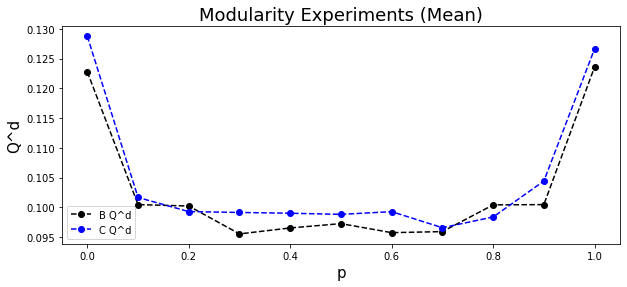

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#x = [i for i in range(1,12)]

ax.set_xlabel('p', fontsize=15)
ax.set_ylabel('Q^d', fontsize=15)
ax.set_title('Modularity Experiments (Mean)', fontsize=18)

plt.plot(p_list, modularity_B, 'o', color='black', label='B Q^d',  linestyle='--')
plt.plot(p_list, modularity_C, 'o', color='blue', label='C Q^d', linestyle='--' )
ax.legend()


Se obtienen los resultados de la hipótesis: 
- Los valores de $Q^d$  son similares en las particiones de B y C en respuesta a que el orden de aparición de los nodos no influyen en la selección de arcos. 

- Se obtienen $Q^d$ similares para $P=0$ y $P=1$, con los valores más altos debido a que los arcos entre particiones tienen una sola dirección.

- Los valores más bajos de $Q^d$ se encuentran alrededor de $P=0.5$ debido a que los arcos entre particiones se reparten equitativamente en ambas direcciones. A medida que $P$ se acerca a los extremos aumenta levemente el valor de  $Q^d$, disparandose en los casos $P=0$ y $P=1$.


## Pregunta 2: Pescado


### a) Reciprocidad corregida.


In [6]:
G_fish = nx.read_pajek("datosT3/pescado.net")

N = G_fish.number_of_nodes()
E = G_fish.number_of_edges()

print(f"Pescado.gdf N: {N}, E: {E}")

Pescado.gdf N: 151, E: 2744


In [7]:
A = nx.adjacency_matrix(G_fish, weight = None).toarray()
print(A.shape)

a_ = E/(N* (N - 1) )
print(a_)
print(np.mean(A))

(151, 151)
0.12114790286975717
0.12034559887724222


In [8]:
sum_p1 = 0
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if (i != j):
            sum_p1 += A[i][j]*A[j][i] 
    
p_1 =  sum_p1/E
p = (p_1 - a_)/(1-a_)
print("p: ", p) # positivo: hay reprocidad

p:  0.3937559737764578


Se obtiene $\rho = 0.39 > 0$, lo que indica una red recíproca. Esto es esperable en esta red de comercio: los peces son diferentes dependiendo de la región y sobre-producción/sobre-demanda en distintos paises favorece reciprocidad. 

### b) Reciprocidad con pesos.

Se utiliza la fórmula sugerida modificada. En este caso se considera $a_{ij}$ como el peso correspondiente al arco i->j. El valor de $\bar{a}$ se considera como una densidad de pesos, y por lo tanto se calcula con la media de todos los valores de la matriz de adyacencia.

In [9]:
A_w = nx.adjacency_matrix(G_fish).toarray() # ahora la consideramos con pesos
print(A_w.shape)

a_w = np.mean(A_w) # cambiamos a_ por media de la matriz de adyacencia
print(a_w)
print("dif: ", abs(a_w- a_))

(151, 151)
2.2400066225165562
dif:  2.118858719646799


In [10]:

numerator = 0
denominator = 0

for i in range(A_w.shape[0]):
    for j in range(A_w.shape[1]):
        if (i != j):
            numerator += (A_w[i][j] - a_w)*(A_w[j][i] - a_w)
            denominator += (A_w[i][j] - a_w)**2

p_w = numerator/denominator

print("p^w: ", p_w) # positivo: hay reprocidad

p^w:  0.17509353194213614


In [11]:
print(np.mean(A_w))
print(np.std(A_w))
print(np.max(A_w))
print(np.min(A_w[np.nonzero(A_w)]))

2.2400066225165562
29.40411406842188
1760.214
0.007


Considerando pesos la densidad $\bar{a}$ cambia en 2 unidades y se obtienen un nuevo $\rho^w = 0.17 < \rho$. La red sigue siendo recíproca (comportamiento de red de comercio) pero disminuye su valor. Comparando el valor máximo de la matriz de adyacencia con el valor mínimo no nulo se obtienen 6 órdenes de magnitud de diferencia, lo que puede indicar la hay existencia de paises que exportan muchas toneladas de pescado a otro pais, pero dicho pais exporta pocas toneladas al pais original, lo que se traduce en una disminución de la reciprocidad.    

### c) Distribuciones $P(s^{in})$ y $P(s^{out})$

Se obtienen los valores de s^{in} y s^{out} usando la librería directamente ya que al especificar los pesos, los suma automáticamente. Se grafican las distribuciones con un histograma y se estiman los parámetros a mano coincidiendo con el histograma de la distribución conocida L.D.P.

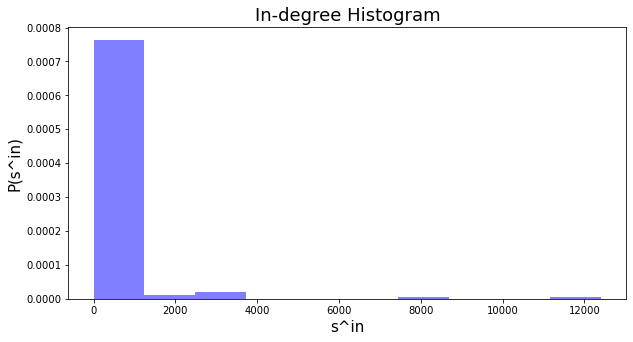

exponent:  -0.95


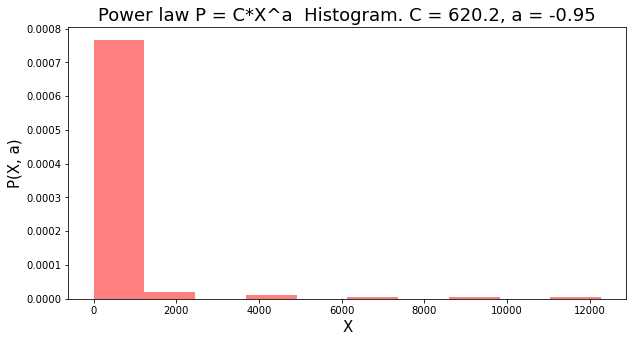

In [12]:
from scipy.stats import powerlaw

# The degree is the sum of the edge weights adjacent to the node. 
indegrees = np.array(G_fish.in_degree(weight = "weight"))[:, 1].astype(np.float)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
#fig.subplots_adjust( hspace=0.5 )

ax.set_xlabel('s^in', fontsize=15)
ax.set_ylabel('P(s^in)', fontsize=15)
ax.set_title('In-degree Histogram', fontsize=18)

hist, bins, _ = plt.hist(indegrees, facecolor='blue', alpha=0.5, density = True)
plt.show()

####################################

a = 0.05

print("exponent: ", a - 1)

np.random.seed(41)
pw_dist = power_law_distribution = powerlaw.rvs(a, size= len(indegrees) )  * np.max(indegrees)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('P(X, a)', fontsize=15)
ax.set_title(f'Power law P = C*X^a  Histogram. C = {np.round(a* np.max(indegrees),1)}, a = {a - 1}', fontsize=18)

hist2, bins2, _ = plt.hist(pw_dist, facecolor='red', alpha=0.5, density = True)
plt.show()


Para obtener el histograma L.D.P que coincide con la distribución $s^{in}$ se utiliza la función powerlaw.rvs que retorna una distribución L.D.P según el parámetro ingresado. El exponente lo calcula como 1-parámetro. Para escalar la distribución a los datos de $s^{in}$ se multiplica la distribución por el mayor valor de  $s^{in}$. El parámetro es estimado a mano hasta obtener el histograma que coincide con los datos observados. Se obtiene una distribución $P =C X^a $ con C = 620.2 y a = -0.95. 

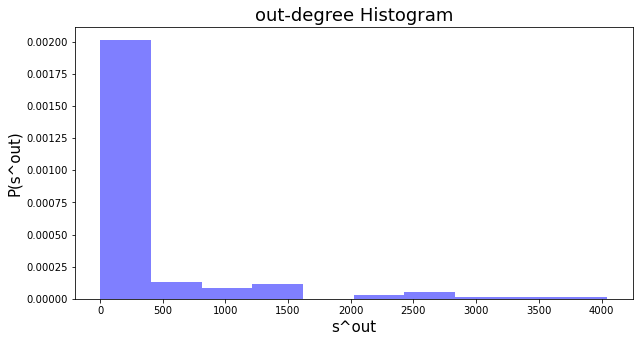

exponent:  -0.9


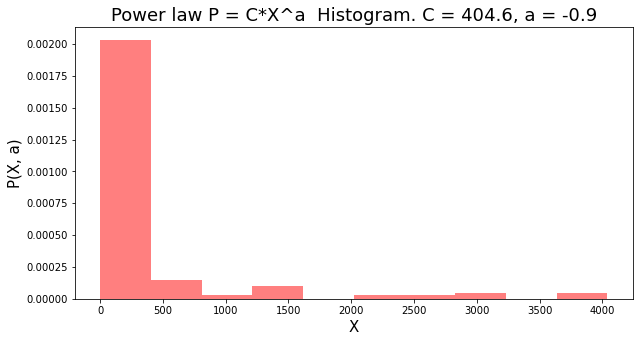

In [13]:

outdegrees = np.array(G_fish.out_degree(weight = "weight"))[:, 1].astype(np.float)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
#fig.subplots_adjust( hspace=0.5 )

ax.set_xlabel('s^out', fontsize=15)
ax.set_ylabel('P(s^out)', fontsize=15)
ax.set_title('out-degree Histogram', fontsize=18)

hist, bins, _ = plt.hist(outdegrees, facecolor='blue', alpha=0.5, density = True)
plt.show()

####################################

a = 0.1

print("exponent: ", a - 1)

np.random.seed(115) # 105, 115
pw_dist = power_law_distribution = powerlaw.rvs(a, size= len(outdegrees) )  * np.max(outdegrees)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('P(X, a)', fontsize=15)
ax.set_title(f'Power law P = C*X^a  Histogram. C = {np.round(a* np.max(outdegrees),1)}, a = {a - 1}', fontsize=18)

hist2, bins2, _ = plt.hist(pw_dist, facecolor='red', alpha=0.5, density = True)
plt.show()


El procedimiento para $s^{out}$ es el mismo: el parámetro es estimado a mano hasta obtener el histograma que coincide con los datos observados. Se obtiene una distribución $P = C X^a $ con C = 404.6 y a = -0.9. 

### d) Dispersión P(s^in), P(s^out)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


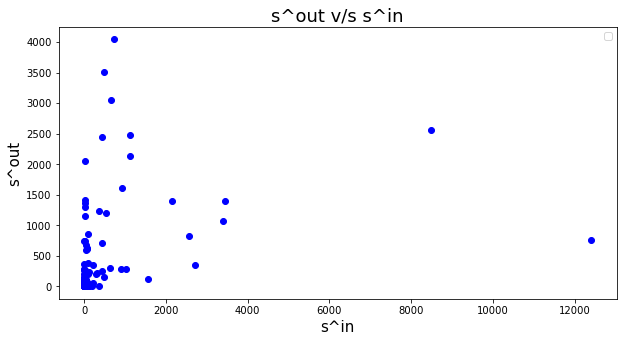

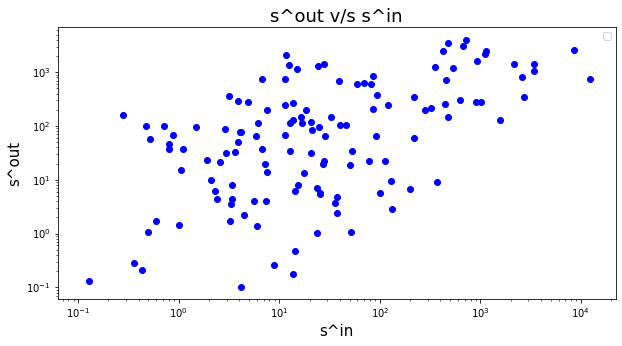

In [14]:
indegrees = np.array(G_fish.in_degree(weight = "weight"))[:, 1].astype(np.float)
outdegrees = np.array(G_fish.out_degree(weight = "weight"))[:, 1].astype(np.float)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('s^in', fontsize=15)
ax.set_ylabel('s^out', fontsize=15)
ax.set_title('s^out v/s s^in', fontsize=18)

plt.plot(indegrees, outdegrees, 'o', color='blue',)
#plt.plot(x, outdegrees, 'o', color='blue', label='s^out', )
ax.legend()



fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)


plt.xscale('log')
plt.yscale('log')

ax.set_xlabel('s^in', fontsize=15)
ax.set_ylabel('s^out', fontsize=15)
ax.set_title('s^out v/s s^in', fontsize=18)

plt.plot(indegrees, outdegrees, 'o', color='blue',)
#plt.plot(x, outdegrees, 'o', color='blue', label='s^out', )
ax.legend()



En el gráfico superior se observa que los valores de $s^{in}$ se concentran en valores menores a 500 para la mayoria de nodos. En cambio los valores $s^{out}$ tienen una mayor dispersión y se distribuyen mayoritariamente entre 0.1 y 1500.  No se observa relación lineal entre las variables ni L.D.P. Un comportamiento interesante son los nodos con $s^{in}$ << $s^{out}$ ó $s^{out}$ << $s^{in}$. Esto consistente con el valor de $\rho^w$ calculado anteriormente y los histogramas L.D.P, lo que indica unos pocos paises donde se exporta grandes cantidades de pescado por sobre lo que importa o visceversa.   

### e) Evaluar P(k), P(s), P(w)

In [15]:
# convertir la red a no dirigida

G_fish_undirected = nx.Graph()
for u,v,data in G_fish.edges(data=True):
    #print(u,v,data['weight'])
    if (G_fish_undirected.has_edge(u, v) ):
        #print(G_fish_undirected[u][v])
        G_fish_undirected[u][v]['weight'] += data['weight']
    else:
        G_fish_undirected.add_edge(u, v, weight = data['weight'])
  
N = G_fish_undirected.number_of_nodes()
E = G_fish_undirected.number_of_edges()

print(f"Pescado underected.gdf N: {N}, E: {E}")

Pescado underected.gdf N: 151, E: 2103


In [16]:
# distribucion k
degs = np.array(G_fish_undirected.degree())[:, 1].astype(np.float)

# distribucion s (fuerza)
s = np.array(G_fish_undirected.degree(weight = "weight"))[:, 1].astype(np.float)

# distribucion pesos 

edges = G_fish_undirected.edges(data=True)
name = "weight"
edges = dict( (x[:-1], x[-1][name]) for x in edges if name in x[-1] )

w = np.array(list(edges.values()))

print(degs.shape)
print(s.shape)
print(w.shape)

(151,)
(151,)
(2103,)


In [17]:
np.mean(degs)

27.85430463576159

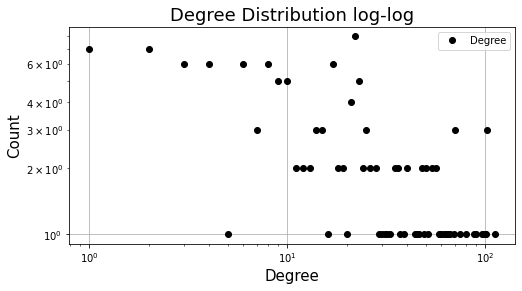

In [18]:
# degree distribution

import collections
colect =  collections.Counter(degs)

x = []
y = []

for key in colect:
    x.append(key)
    y.append(colect[key])
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('Degree', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Degree Distribution log-log', fontsize=18)
plt.plot(x, y, 'o', color='black', label='Degree')
ax.legend()



La distribución k no parece tener la forma carácteristica de una L.D.P. No es estimaron parámetros.

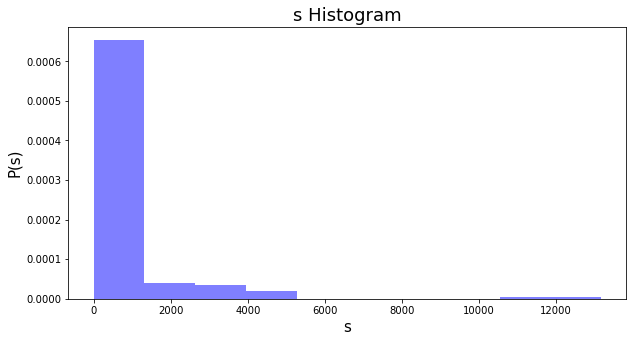

exponent:  -0.91


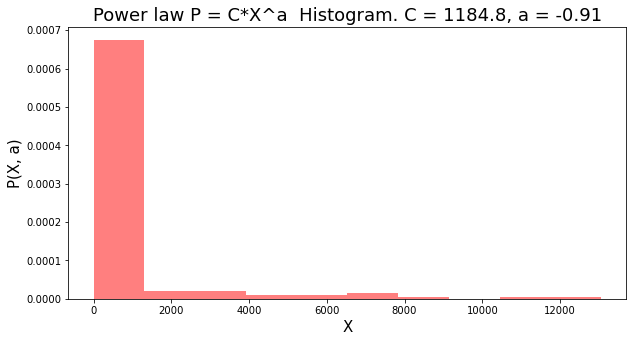

In [19]:
# s distribution

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
#fig.subplots_adjust( hspace=0.5 )

ax.set_xlabel('s', fontsize=15)
ax.set_ylabel('P(s)', fontsize=15)
ax.set_title('s Histogram', fontsize=18)

hist, bins, _ = plt.hist(s, facecolor='blue', alpha=0.5, density = True)
plt.show()

####################################

a = 0.09

print("exponent: ", a - 1)

np.random.seed(105) # 105, 115
pw_dist = power_law_distribution = powerlaw.rvs(a, size= len(s) )  * np.max(s)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('P(X, a)', fontsize=15)
ax.set_title(f'Power law P = C*X^a  Histogram. C = {np.round(a* np.max(s),1)}, a = {a - 1}', fontsize=18)

hist2, bins2, _ = plt.hist(pw_dist, facecolor='red', alpha=0.5, density = True)
plt.show()

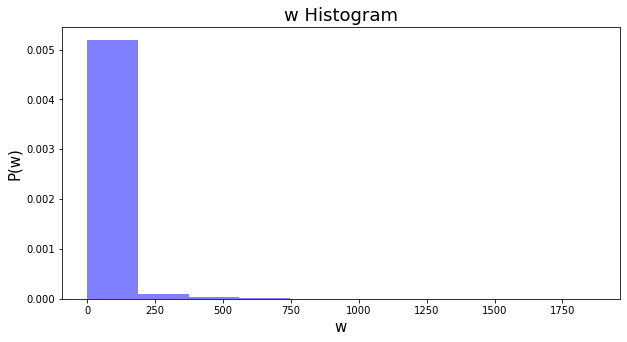

exponent:  -0.985


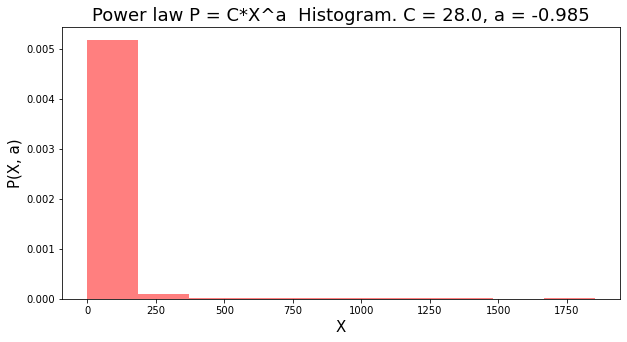

In [20]:
# w distribution

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
#fig.subplots_adjust( hspace=0.5 )

ax.set_xlabel('w', fontsize=15)
ax.set_ylabel('P(w)', fontsize=15)
ax.set_title('w Histogram', fontsize=18)

hist, bins, _ = plt.hist(w, facecolor='blue', alpha=0.5, density = True)
plt.show()

####################################

a = 0.015

print("exponent: ", a - 1)

np.random.seed(115) # 105, 115
pw_dist = power_law_distribution = powerlaw.rvs(a, size= len(w) )  * np.max(w)

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('P(X, a)', fontsize=15)
ax.set_title(f'Power law P = C*X^a  Histogram. C = {np.round(a* np.max(w),1)}, a = {a - 1}', fontsize=18)

hist2, bins2, _ = plt.hist(pw_dist, facecolor='red', alpha=0.5, density = True)
plt.show()

Las distribuciones $P(s)$ y $P(w)$ tienen la forma caracterísitca de un histograma de una distribución ley de potencia. Usando el mismo procedimiento de calzar histogramas y estimar a mano el parámetro se obtienen que $P(s) = 1184,8 \cdot s^{-0.91}$ y $P(w) = 28,0 \cdot w^{-0.985}$.


### f) Dispersión grado y fuerza.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


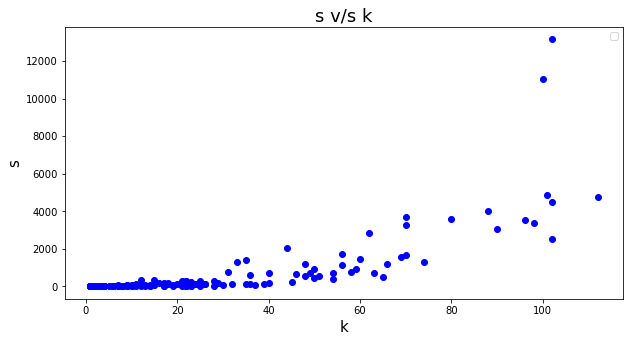

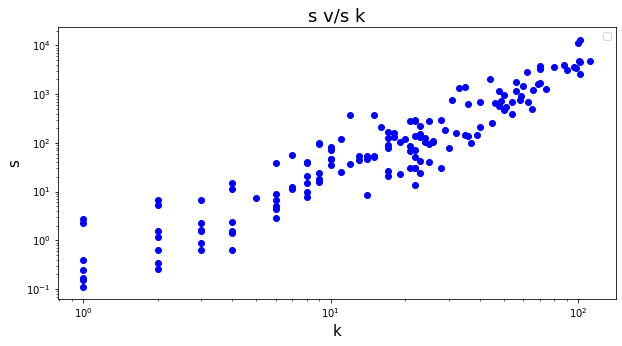

In [21]:

fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('k', fontsize=15)
ax.set_ylabel('s', fontsize=15)
ax.set_title('s v/s k', fontsize=18)

plt.plot(degs, s, 'o', color='blue',)
#plt.plot(x, outdegrees, 'o', color='blue', label='s^out', )
ax.legend()



fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('k', fontsize=15)
ax.set_ylabel('s', fontsize=15)
ax.set_title('s v/s k', fontsize=18)

plt.xscale('log')

plt.yscale('log')


plt.plot(degs, s, 'o', color='blue',)
#plt.plot(x, outdegrees, 'o', color='blue', label='s^out', )
ax.legend()

La relación entre las variables no es lineal. Observando el gráfico superior se puede apreciar una curva de potencia que se dispara en $k \sim 100$. Realizando una gráfica log-log se aprecia una tendencia a una ley de potencia con mucho ruido y exponente positivo.

### g) Evaluar coef. clustering.

Debido a que la red original es es multigrafo se utiliza un nuevo grafo dirigido que suma los pesos 
de los arcos $u -> v$ repetidos. 

In [22]:
# debido a que G_fish es multigraph, se crea un G_simp.
# por ello se crea un grafo dirigido G_fish_simp que suma los pesos 
# de los arcos u -> v repetidos

G_fish_simp = nx.DiGraph()

for u,v,data in G_fish.edges(data=True):
    #print(u,v,data['weight'])
    if (G_fish_simp.has_edge(u, v) ):
        #print(G_fish_undirected[u][v])
        G_fish_simp[u][v]['weight'] += data['weight']
    else:
        G_fish_simp.add_edge(u, v, weight = data['weight'])
  
N = G_fish_simp.number_of_nodes()
E = G_fish_simp.number_of_edges()

print(f"Pescado directed (not multidigraph).gdf N: {N}, E: {E}\n")
print("Clustering coefficient (directed)", nx.average_clustering(G_fish_simp, weight = 'weight'))
print("Clustering coefficient (undirected)", nx.average_clustering(G_fish_undirected, weight = 'weight'))


Pescado directed (not multidigraph).gdf N: 151, E: 2744

Clustering coefficient (directed) 0.0019685717736533633
Clustering coefficient (undirected) 0.003031779210446067


Se obtienen un coeficiente de clustering levemente mayor para el caso no dirigido, aunque ambos son muy similares con una diferencia de tan solo 0.0001. Una posible explicación es que no sea rentable la transitividad comercial entre paises en la exportación/importación de pescado debido a las distancias. Considerando los costos de transporte por distancia se favorecen relaciones entre pais-pais por sobre transitividad de comercio entre más de dos paises.  

## Pregunta 3: Ciudades



In [23]:
# importar datos de cities
city_pob = []

file = open("datosT3/cities.txt", "r")
for line in file:
    #print(line.split('\n')[0])
    city_pob.append(line.split('\n')[0])

file.close()
city_pob = np.array(city_pob).astype(np.int) # almacenar como array de enteros
city_pob

array([      1,       1,       2, ..., 2896047, 3694742, 8008654])

Como primer acercamiento se grafica la frecuencia de las distintas poblaciones. 

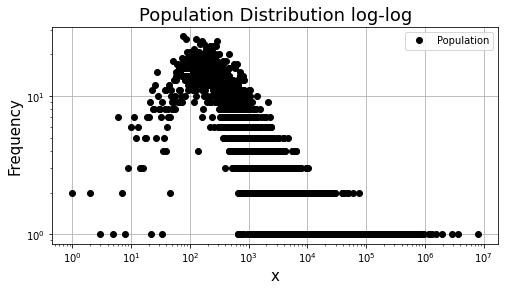

In [24]:
# population distribution

import collections
colect =  collections.Counter(city_pob) # contar la frecuencia de cada grado

x = []
y = []

for key in colect:
    x.append(key)
    y.append(colect[key])
    
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Population Distribution log-log', fontsize=18)
plt.plot(x, y, 'o', color='black', label='Population')
ax.legend()



Al hacer el gráfico log-log se aprecia una curva similar a L.D.P a partir de la población $10^3$. Sin embargo el ruido en la cola no permite obtener la curva característica. Se procede a realizar un histograma utilizando bins exponenciales en base 2.  

In [25]:
# calcular cota superior para funcion logspace, para crear bins exponenciales
stop = 3
num = 2
while(True):
    num*=2
    stop += 1
    if (num >  np.max(city_pob)):
        break
        
print(stop)

# crear bins exponenciales con base 2
bins =  np.logspace(0, stop, base= 2, num = stop, endpoint=False)
bins

25


array([1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
       1.6000000e+01, 3.2000000e+01, 6.4000000e+01, 1.2800000e+02,
       2.5600000e+02, 5.1200000e+02, 1.0240000e+03, 2.0480000e+03,
       4.0960000e+03, 8.1920000e+03, 1.6384000e+04, 3.2768000e+04,
       6.5536000e+04, 1.3107200e+05, 2.6214400e+05, 5.2428800e+05,
       1.0485760e+06, 2.0971520e+06, 4.1943040e+06, 8.3886080e+06,
       1.6777216e+07])

In [26]:
# contar frecuencia por bins
count_by_bin = np.zeros(len(bins) - 1)

i = 0
for pob in city_pob:
    if (pob > bins[i] ):
        i+=1
    count_by_bin[i]+=1
count_by_bin

array([2.000e+00, 2.000e+00, 1.000e+00, 1.100e+01, 3.600e+01, 1.260e+02,
       3.130e+02, 9.880e+02, 1.966e+03, 2.807e+03, 3.218e+03, 2.808e+03,
       2.277e+03, 1.769e+03, 1.299e+03, 8.560e+02, 5.420e+02, 2.630e+02,
       1.000e+02, 3.500e+01, 1.900e+01, 6.000e+00, 2.000e+00, 1.000e+00])

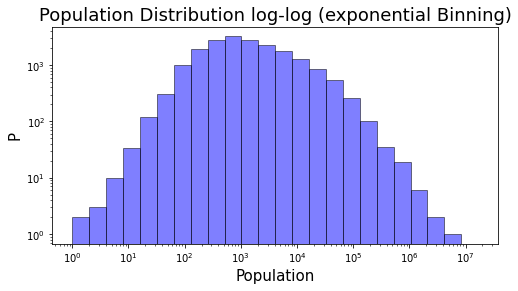

C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


33514.47365359511 -0.33142823793602066
216523914.00555155 -1.162156009192884


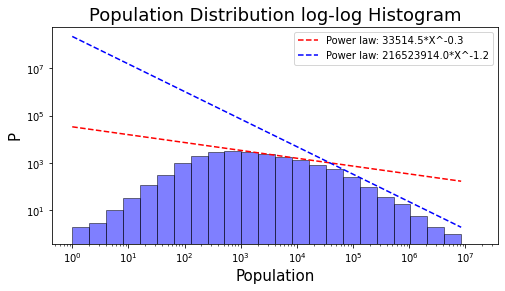

In [27]:
from scipy.optimize import curve_fit


def objective(x, a, b, c, d) : # funcion objetivo: ley de potencia
    return a * np.power(x, b)


## log-log histogram. exponential binning
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('Population', fontsize=15)
ax.set_ylabel('P', fontsize=15)
ax.set_title('Population Distribution log-log (exponential Binning)', fontsize=18)

plt.hist(city_pob, bins=bins, facecolor='blue', alpha=0.5, histtype='bar', ec='black')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.show()


## log-log histogram. exponential binning.
## se grafican un fit de los datos con una ley de potencia por tramos
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

ax.set_xlabel('Population', fontsize=15)
ax.set_ylabel('P', fontsize=15)
ax.set_title('Population Distribution log-log Histogram', fontsize=18)


plt.yscale('log')
plt.xscale('log')

# tramo 1:  bins[10:16] 
popt, _ = curve_fit(objective, bins[10:16], count_by_bin[10:16]) # fit ley de potencia
a, b, c, d  = popt
print(a,b,)
x_line = np.arange(np.min(bins[:-1]), np.max(bins[:-1]), 1)
y_line = objective(x_line, a, b, c, d)

# tramo 2:  bins[16:25] 
popt, _ = curve_fit(objective, bins[16:-1], count_by_bin[16:]) # fit ley de potencia
a_2, b_2, c, d  = popt
print(a_2,b_2)
x_line_2 = np.arange(np.min(bins[:-1]), np.max(bins[:-1]), 1)
y_line_2 = objective(x_line_2, a_2, b_2, c, d)

plt.hist(city_pob, bins=bins, facecolor='blue', alpha=0.5, histtype='bar', ec='black')
plt.plot(x_line, y_line, '--', color='red',  label=f'Power law: {np.round(a,1)}*X^{np.round(b, 1)}')
plt.plot(x_line_2, y_line_2, '--', color='blue',  label=f'Power law: {np.round(a_2,1)}*X^{np.round(b_2, 1)}')
ax.legend()


#plt.show()

Gracias al histograma usando los bins exponenciales se puede apreciar dos posibles curvas L.D.P: un tramo de $10^3$ a $10^{4.5}$ y de $10^{4.5}$ en adelante. Con la función curve_fit se obtienen los parámetros de las L.D.P dependiendo del tramo, obteniendo:

$ 33514\cdot X^{-0.3} $ y  $2.1^8\cdot X^{-1.2}$ respectivamente.

A continuación se ocupan los mismos bins para realizar una dispersión. 

C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


33514.47365359511 -0.33142823793602066
216523914.00555155 -1.162156009192884


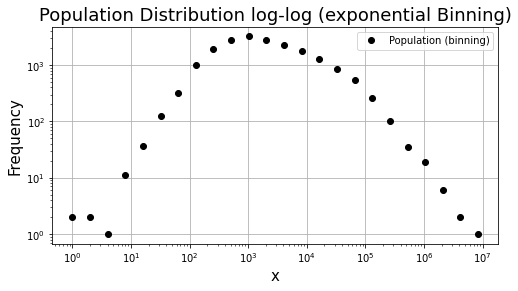

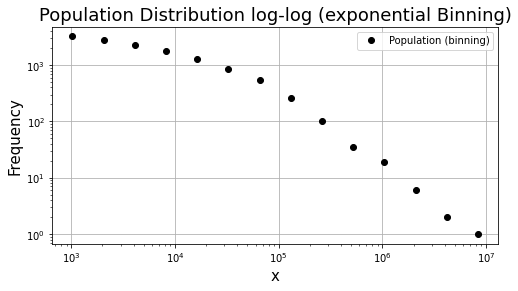

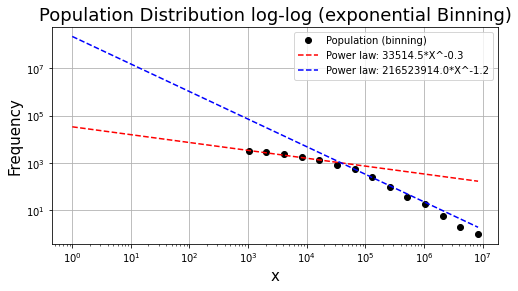

In [28]:
# Grafico de dispersion usando bins exponenciales
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Population Distribution log-log (exponential Binning)', fontsize=18)
plt.plot(bins[:-1], count_by_bin, 'o', color='black', label='Population (binning)')

ax.legend()

# Grafico de dispersion usando bins exponenciales desde el bin[10:]

fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Population Distribution log-log (exponential Binning)', fontsize=18)
plt.plot(bins[10:-1], count_by_bin[10:], 'o', color='black', label='Population (binning)')

ax.legend()


# Grafico de dispersion usando bins exponenciales desde el bin[10:]
# junto a los dos tramos de ley de potencia 
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Population Distribution log-log (exponential Binning)', fontsize=18)
#ax.legend()

popt, _ = curve_fit(objective, bins[10:16], count_by_bin[10:16]) # fit ley de potencia tramo 1
a, b, c, d  = popt
print(a,b,)
x_line = np.arange(np.min(bins[:-1]), np.max(bins[:-1]), 1)
y_line = objective(x_line, a, b, c, d)


popt, _ = curve_fit(objective, bins[16:-1], count_by_bin[16:]) # fit ley de potencia tramo 2
a_2, b_2, c, d  = popt
print(a_2,b_2)
x_line_2 = np.arange(np.min(bins[:-1]), np.max(bins[:-1]), 1)
y_line_2 = objective(x_line_2, a_2, b_2, c, d)


plt.plot(bins[10:-1], count_by_bin[10:], 'o', color='black', label='Population (binning)')

plt.plot(x_line, y_line, '--', color='red',  label=f'Power law: {np.round(a,1)}*X^{np.round(b, 1)}')
plt.plot(x_line_2, y_line_2, '--', color='blue',  label=f'Power law: {np.round(a_2,1)}*X^{np.round(b_2, 1)}')

ax.legend()

Graficando la dispersión log-log se puede apreciar mejor el fit de los tramos L.D.P. a partir de $10^3$ Como se usaron los mismos datos la estimación es la misma. 

Por último se va a comparar la acumulada:

In [29]:
# contar frecuencia por bins
count_acumulative_by_bin = np.zeros(len(bins) - 1)

i = 0
for pob in city_pob:
    if (pob > bins[i] ):
        i+=1
        count_acumulative_by_bin[i] = count_by_bin[i-1]
    count_acumulative_by_bin[i]+=1
count_acumulative_by_bin

array([2.000e+00, 4.000e+00, 3.000e+00, 1.200e+01, 4.700e+01, 1.620e+02,
       4.390e+02, 1.301e+03, 2.954e+03, 4.773e+03, 6.025e+03, 6.026e+03,
       5.085e+03, 4.046e+03, 3.068e+03, 2.155e+03, 1.398e+03, 8.050e+02,
       3.630e+02, 1.350e+02, 5.400e+01, 2.500e+01, 8.000e+00, 3.000e+00])

In [30]:
# contar frecuencia por bins
pob_cumulative = np.zeros(len(city_pob) + 1)

x = np.zeros(len(city_pob))

for i, pob in enumerate(city_pob):
    pob_cumulative[i+1] = pob_cumulative[i] +  pob
    x[i] = pob
pob_cumulative = np.flip(pob_cumulative[1:])
#pob_cumulative = pob_cumulative[1:]

print(x.shape)
print(pob_cumulative.shape)



(19447,)
(19447,)


In [31]:
pob_cumulative[15000:]


array([7.87069e+05, 7.86737e+05, 7.86405e+05, ..., 4.00000e+00,
       2.00000e+00, 1.00000e+00])

C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


8889984908.95377 -1.0816873487474592
1092219597055646.5 -2.2503340767728246


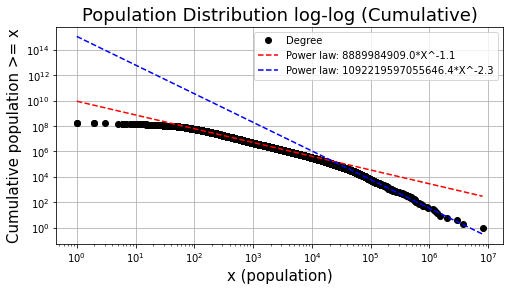

In [32]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

popt, _ = curve_fit(objective, x[10**3:19000], pob_cumulative[10**3:19000]) # fit ley de potencia 
a, b, c, d  = popt


print(a,b,)
x_line = np.arange(np.min(x), np.max(x))
y_line = objective(x_line, a, b, c, d)

popt, _ = curve_fit(objective, x[19000:], pob_cumulative[19000:]) # fit ley de potencia 
a_2, b_2, c, d  = popt
print(a_2,b_2,)

x_line_2 = np.arange(np.min(x), np.max(x))
y_line_2 = objective(x_line_2, a_2, b_2, c, d)


plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('x (population)', fontsize=15)
ax.set_ylabel('Cumulative population >= x', fontsize=15)
ax.set_title('Population Distribution log-log (Cumulative)', fontsize=18)
plt.plot(x, pob_cumulative, 'o', color='black', label='Degree')
plt.plot(x_line, y_line, '--', color='red',  label=f'Power law: {np.round(a,1)}*X^{np.round(b, 1)}')
plt.plot(x_line_2, y_line_2, '--', color='blue',  label=f'Power law: {np.round(a_2,1)}*X^{np.round(b_2, 1)}')

ax.legend()


Nuevamente se obtienen dos curvas L.D.P en 2 tramos. La diferencia es que la sección inicial de la curva se adapta mejor a la L.D.P del primer tramo y por lo tanto cambian los parámetos al hacer la estimación. 

## Pregunta 4: Arena

Erdös-Renyi - <k> = N*p => p = <k>/N

Para ambos E.R y B.A se decide eliminar los nodos con grado 0. Esto implica que cambien levemente los valores de $N$ y $<k>$ en las redes respecto a sus versiones originales.

In [33]:
N = 1000

# le agregamos 200 nodos extra a ER porque despues eliminaremos nodos con grado 0 
G_r = nx.erdos_renyi_graph(N + 200, 2/N, seed=(1)) 
G_BA = nx.barabasi_albert_graph(N, 1, seed=(1))

degs_G_r = np.array(G_r.degree())[:, 1]
degs_G_BA = np.array(G_BA.degree())[:, 1]

print("Grado promedio ER: ", np.mean(degs_G_r))
print("Grado promedio BA:", np.mean(degs_G_BA))


## eliminar nodos con grado 0
for i, deg in enumerate(degs_G_r):
    if (deg == 0):
        G_r.remove_node(i)
        
for i, deg in enumerate(degs_G_BA):
    if (deg == 0):
        G_BA.remove_node(i)

degs_G_r = np.array(G_r.degree())[:, 1].astype(np.float)
degs_G_BA = np.array(G_BA.degree())[:, 1].astype(np.float)

# checkear si no quedan nodos con grado 0
for i, deg in enumerate(degs_G_r):
    if (deg == 0):
       print("0 encontrado")
for i, deg in enumerate(degs_G_BA):
    if (deg == 0):
       print("0 encontrado")
       

print("Grado promedio ER (filtered): ", np.mean(degs_G_r))
print("Grado promedio BA (filtered):", np.mean(degs_G_BA))
print("N ER (filtered): ", G_r.number_of_nodes())
print("N BA (filtered): ", G_BA.number_of_nodes() )


# balde[0] = numero de granos del nodo 0,      
balde_G_r = {}
balde_G_BA = {}

# inicializar baldes

for u in G_r.nodes():
    np.random.seed(13 * (u + 1)) 
    granos = np.random.randint(low = 0, high = G_r.degree()[u] + 1)
    #print(u, G_r.degree()[u], granos )
    balde_G_r[u] = granos


for u in G_BA.nodes():
    np.random.seed(17 * (u + 1)) 
    granos = np.random.randint(low = 0, high = G_BA.degree()[u] + 1)
    balde_G_BA[u] = granos


    

Grado promedio ER:  2.3316666666666666
Grado promedio BA: 1.998
Grado promedio ER (filtered):  2.569329660238751
Grado promedio BA (filtered): 1.998
N ER (filtered):  1089
N BA (filtered):  1000


In [34]:
# iteraciones
n_iteraciones = 10000

z = 1 # contador para controlar random seed

avalanchas_ER = []
avalanchas_BA = []

for i in range(n_iteraciones):
    print(i)
    cont_avalancha_ER = 0
    cont_avalancha_BA = 0
    
    # elegir nodo aleatorio (que exista en la red ER)
    k = 1
    while(True):
        np.random.seed(29 * (i + 1) * k) 
        nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
        if (G_r.has_node(nodo_random_ER)):
            break
        k+=1
    
    # elegir nodo aleatorio (que exista en la red BA)
    k = 1
    while(True):
        np.random.seed(37 * (i + 1) * k)
        nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
        if (G_BA.has_node(nodo_random_BA)):
            break
        k+=1

    # agregarle un grano
    balde_G_r[nodo_random_ER] += 1
    balde_G_BA[nodo_random_BA] += 1
    
    
    ############################## Experimento ER ##############################
    
    check_nodes = [] # lista de nodos a revisar, el nodo actual sera el pop(0) 
    check_nodes.append(nodo_random_ER)
    
    while (True): # avalancha en red ER
        #print(len(check_nodes))
        if (len(check_nodes) == 0): # no quedan nodos por checkear, finalizar avalancha 
            break
            
        nodo_actual = check_nodes.pop(0)
        
        if ( balde_G_r[nodo_actual] > G_r.degree()[nodo_actual] ): # nodo rebalsado
            cont_avalancha_ER+=1
            
            #print(f"nodo {nodo_actual} rebalsado")
            for v in G_r.neighbors(nodo_actual): # por cada vecino
                balde_G_r[nodo_actual] -= 1
                
                z+=1 # para el seed
                random.seed(13*(i+1)*z)
                if (random.random() > 0.001): # aumentado para evitar tanto tiempo de computo
                    
                    balde_G_r[v] += 1
                    if ( balde_G_r[v] > G_r.degree()[v] ): # nodo vecino rebalsado, se agrega al check
                        check_nodes.append(v)
                else:
                    pass
                    #print(f"grano perdido desde {nodo_actual} -> {v}")
        else:
            pass
            #print(f"{nodo_actual} no rebalsa")
    avalanchas_ER.append(cont_avalancha_ER)
    
    ############################## Experimento BA ##############################
    
    check_nodes = [] # lista de nodos a revisar, el nodo actual sera el pop 
    check_nodes.append(nodo_random_BA)
    
    while (True): # avalancha en red BA
        #print(len(check_nodes))
        if (len(check_nodes) == 0): # no quedan nodos por checkear,  finalizar avalancha 
            break
            
        nodo_actual = check_nodes.pop(0)
        
        if ( balde_G_BA[nodo_actual] > G_BA.degree()[nodo_actual] ): # nodo rebalsado
            cont_avalancha_BA+=1
            
            #print(f"nodo {nodo_actual} rebalsado")
            for v in G_BA.neighbors(nodo_actual): # por cada vecino
                balde_G_BA[nodo_actual] -= 1
                
                z+=1 # para el seed
                random.seed(17*(i+1)*z)
                if (random.random() > 0.001): # aumentado para evitar tanto tiempo de computo    
                    balde_G_BA[v] += 1
                    if ( balde_G_BA[v] > G_BA.degree()[v] ): # nodo vecino rebalsado, se agrega al check
                        check_nodes.append(v)
                else:
                    pass
                    #print(f"grano perdido desde {nodo_actual} -> {v}")
        else:
            pass
            #print(f"{nodo_actual} no rebalsa")
    avalanchas_BA.append(cont_avalancha_BA)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711


5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350


6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005


8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644


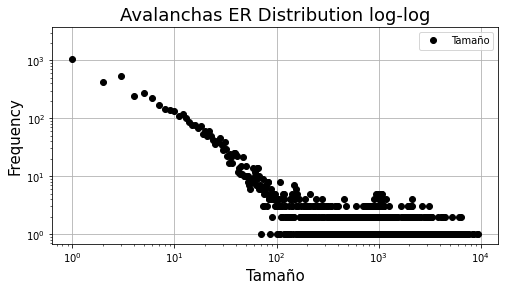

In [35]:

colect =  collections.Counter(avalanchas_ER) # contar la frecuencia de cada avalancha

x = []
y = []

for key in colect:
    x.append(key)
    y.append(colect[key])
    
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('Tamaño', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Avalanchas ER Distribution log-log', fontsize=18)
plt.plot(x, y, 'o', color='black', label='Tamaño')
ax.legend()



Graficando una dispersión log-log de la frecuencia de los tamaños se encuentra una curva similar a una L.D.P con mucho ruido en la cola. Se procede a analizar usando binning.

In [36]:
np.max(avalanchas_ER)

9414

16
[1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
 6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02 1.0240e+03 2.0480e+03
 4.0960e+03 8.1920e+03 1.6384e+04 3.2768e+04]
1102.150666988761 -0.17617305988418247


C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


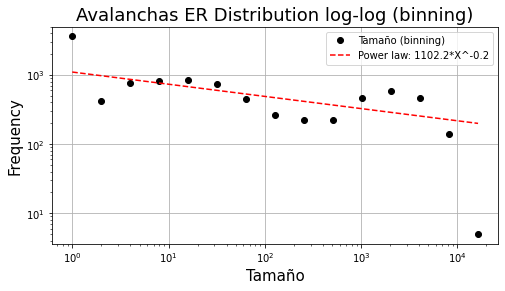

In [37]:
# calcular cota superior para funcion logspace, para crear bins exponenciales
stop = 3
num = 2
while(True):
    num*=2
    stop += 1
    if (num >  np.max(avalanchas_ER)):
        break
        
print(stop)

# crear bins exponenciales con base 2
bins =  np.logspace(0, stop, base= 2, num = stop, endpoint=False)
print(bins)

# contar frecuencia por bins
count_by_bin = np.zeros(len(bins) - 1)

i = 0
for tamano in np.sort(avalanchas_ER):
    if (tamano > bins[i] ):
        i+=1
    count_by_bin[i]+=1
count_by_bin

# Grafico de dispersion usando bins exponenciales
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)


popt, _ = curve_fit(objective, bins[2:-1], count_by_bin[2:]) # fit ley de potencia
a, b, c, d  = popt
print(a,b,)
x_line = np.arange(np.min(bins[:-1]), np.max(bins[:-1]), 1)
y_line = objective(x_line, a, b, c, d)


plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('Tamaño', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Avalanchas ER Distribution log-log (binning)', fontsize=18)
plt.plot(bins[:-1], count_by_bin, 'o', color='black', label='Tamaño (binning)')
plt.plot(x_line, y_line, '--', color='red',  label=f'Power law: {np.round(a,1)}*X^{np.round(b, 1)}')

ax.legend()


Para hacer fit de la curva L.D.P se considera desde el segundo bin. Se obtiene la curva $1102 \cdot X^{-0.2}$ para los tamaños de avalancha en E.R. 

A continuación se repite el procedimiento para la red B.A

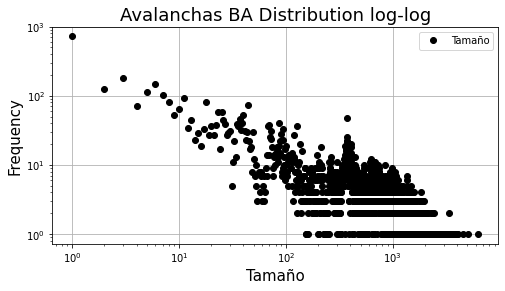

In [38]:

colect =  collections.Counter(avalanchas_BA) # contar la frecuencia de cada avalancha

x = []
y = []

for key in colect:
    x.append(key)
    y.append(colect[key])
    
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('Tamaño', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Avalanchas BA Distribution log-log', fontsize=18)
plt.plot(x, y, 'o', color='black', label='Tamaño')
ax.legend()



Al igual que el caso E.R, se encuentra una curva similar a una L.D.P con mucho ruido en la cola. 

15
[1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
 6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02 1.0240e+03 2.0480e+03
 4.0960e+03 8.1920e+03 1.6384e+04]
17353422.131120503 -1.2962925732271982


C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


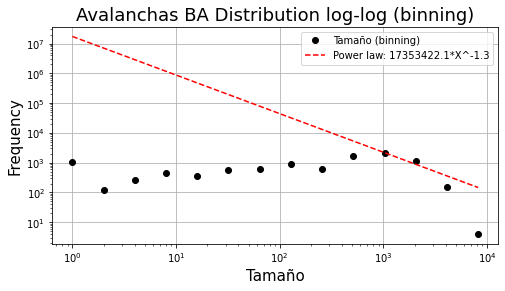

In [39]:
# calcular cota superior para funcion logspace, para crear bins exponenciales
stop = 3
num = 2
while(True):
    num*=2
    stop += 1
    if (num >  np.max(avalanchas_BA)):
        break
        
print(stop)

# crear bins exponenciales con base 2
bins =  np.logspace(0, stop, base= 2, num = stop, endpoint=False)
print(bins)

# contar frecuencia por bins
count_by_bin = np.zeros(len(bins) - 1)

i = 0
for tamano in np.sort(avalanchas_BA):
    if (tamano > bins[i] ):
        i+=1
    count_by_bin[i]+=1
count_by_bin


popt, _ = curve_fit(objective, bins[10:-1], count_by_bin[10:]) # fit ley de potencia
a, b, c, d  = popt
print(a,b,)
x_line = np.arange(np.min(bins[:-1]), np.max(bins[:-1]), 1)
y_line = objective(x_line, a, b, c, d)





# Grafico de dispersion usando bins exponenciales
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('Tamaño', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Avalanchas BA Distribution log-log (binning)', fontsize=18)
plt.plot(bins[:-1], count_by_bin, 'o', color='black', label='Tamaño (binning)')
plt.plot(x_line, y_line, '--', color='red',  label=f'Power law: {np.round(a,1)}*X^{np.round(b, 1)}')

ax.legend()

Al realizar el gráfico con binnig no se obtiene una curva característica de L.D.P, obteniendo una recta constante en log-log. Se intentará obtener los parámetros utilizando la distribución original.

275.1160841149413 -0.6608034231149191


C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\Alvaro-Note\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


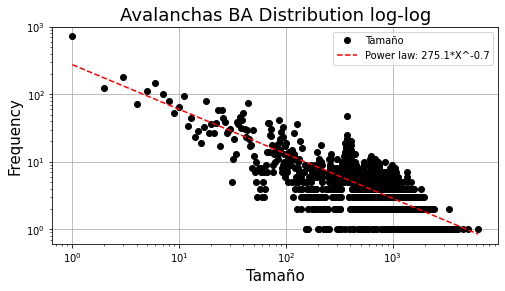

In [40]:

colect =  collections.Counter(avalanchas_BA) # contar la frecuencia de cada avalancha

x = []
y = []

for key in colect:
    x.append(key)
    y.append(colect[key])
    
popt, _ = curve_fit(objective, x[2:], y[2:]) # fit ley de potencia
a, b, c, d  = popt
print(a,b,)
x_line = np.arange(np.min(x), np.max(x), 1)
y_line = objective(x_line, a, b, c, d)

    
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.set_xlabel('Tamaño', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Avalanchas BA Distribution log-log', fontsize=18)
plt.plot(x, y, 'o', color='black', label='Tamaño')
plt.plot(x_line, y_line, '--', color='red',  label=f'Power law: {np.round(a,1)}*X^{np.round(b, 1)}')

ax.legend()



Haciendo fit de la curva con los datos de avalancha en B.A sin binning podemos obtener una L.D.P
$275.1 \cdot X{-0.7}$.

## Pregunta 5: Contagio.

Se considera un tiempo máximo por simulación de 100 iteraciones y 30 simulaciones por estrategia.


In [41]:
N = 10000

G_r = nx.erdos_renyi_graph(N, 4/N, seed=(1)) 
G_BA = nx.barabasi_albert_graph(N, 2, seed=(1))

degs_G_r = np.array(G_r.degree())[:, 1]
degs_G_BA = np.array(G_BA.degree())[:, 1]

print("Grado promedio ER: ", np.mean(degs_G_r))
print("Grado promedio BA:", np.mean(degs_G_BA))


## eliminar nodos con grado 0
for i, deg in enumerate(degs_G_r):
    if (deg == 0):
        G_r.remove_node(i)
        
for i, deg in enumerate(degs_G_BA):
    if (deg == 0):
        G_BA.remove_node(i)

degs_G_r = np.array(G_r.degree())[:, 1].astype(np.float)
degs_G_BA = np.array(G_BA.degree())[:, 1].astype(np.float)

# checkear si no quedan nodos con grado 0
for i, deg in enumerate(degs_G_r):
    if (deg == 0):
       print("0 encontrado")
for i, deg in enumerate(degs_G_BA):
    if (deg == 0):
       print("0 encontrado")
       

print("Grado promedio ER (filtered): ", np.mean(degs_G_r))
print("Grado promedio BA (filtered):", np.mean(degs_G_BA))
print("N ER (filtered): ", G_r.number_of_nodes())
print("N BA (filtered): ", G_BA.number_of_nodes() )



Grado promedio ER:  4.0136
Grado promedio BA: 3.9992
Grado promedio ER (filtered):  4.080520536803578
Grado promedio BA (filtered): 3.9992
N ER (filtered):  9836
N BA (filtered):  10000


### a) Estrategia 0: no hacer nada.

In [42]:


n_simulaciones = 30 

tiempo_maximo = 100

infectados_tiempo_ER = np.zeros((n_simulaciones, tiempo_maximo))
infectados_tiempo_BA = np.zeros((n_simulaciones, tiempo_maximo))


##################### experimento 0 ( no hacer nada) ################################
    
for e in range(n_simulaciones):    

    G_r_infectados = {} # key: nodo, value: tiempo
    G_BA_infectados = {}

    G_r_recuperados = set() # nodos
    G_BA_recuperados = set()

    #print("\nexperimento: ", e)
    # elegir nodo aleatorio (que exista en la red ER)
    k = 1
    while(True):
        np.random.seed(29 * (k+1) * (e+1) ) 
        nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
        if (G_r.has_node(nodo_random_ER) and nodo_random_ER not in G_r_recuperados):
            break
        k+=1

    # elegir nodo aleatorio (que exista en la red BA)
    k = 1
    while(True):
        np.random.seed(37 * (k+1) * (e+1))
        nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
        if (G_BA.has_node(nodo_random_BA) and nodo_random_BA not in G_BA_recuperados):
            break
        k+=1

    # infectarlo
    G_r_infectados[nodo_random_ER] = 0
    G_BA_infectados[nodo_random_BA] = 0

    ###################### EXPERIMENTO ER ###############################
    for t in range(tiempo_maximo):
        #print("t: ", t)
        #print("Infectados: ", len(G_r_infectados))
        #print("Recuperados: ", len(G_r_recuperados))
        #print("Suseptibles: ",G_r.number_of_nodes() - len(G_r_infectados) - len(G_r_recuperados))

        if ( len(G_r_infectados) == 0 or (len(G_r_infectados) +   len(G_r_recuperados) == G_r.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_r_infectados: # por cada infectado

            for v in G_r.neighbors(nodo_actual): # por cada vecino
                if (v in G_r_infectados or v in G_r_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(13*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_r_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_r_infectados:
            G_r_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_r_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_r_infectados[infectado]
            G_r_recuperados.add(infectado)

        infectados_tiempo_ER[e][t] = len(G_r_infectados)

    ###################### EXPERIMENTO BA ###############################
    for t in range(tiempo_maximo):

        if ( len(G_BA_infectados) == 0 or (len(G_BA_infectados) +   len(G_BA_recuperados) == G_BA.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_BA_infectados: # por cada infectado

            for v in G_BA.neighbors(nodo_actual): # por cada vecino
                if (v in G_BA_infectados or v in G_BA_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(11*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_BA_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_BA_infectados:
            G_BA_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_BA_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_BA_infectados[infectado]
            G_BA_recuperados.add(infectado)

        infectados_tiempo_BA[e][t] = len(G_BA_infectados)

        
# graficar resultados

results_ER_0 = np.mean(infectados_tiempo_ER, axis = 0)
results_BA_0 = np.mean(infectados_tiempo_BA, axis = 0)



### b) Estrategia 1: escoger 500 nodos al azar y vacunarlos.

In [43]:

##################### Experimento 1: 500 vacunas aleatorias  ################################
z = 1
n_simulaciones = 30 

n_vacunas = 500
tiempo_maximo = 100

infectados_tiempo_ER = np.zeros((n_simulaciones, tiempo_maximo))
infectados_tiempo_BA = np.zeros((n_simulaciones, tiempo_maximo))

for e in range(n_simulaciones):    

    G_r_infectados = {} # key: nodo, value: tiempo
    G_BA_infectados = {}

    G_r_recuperados = set() # nodos
    G_BA_recuperados = set()
    
    ## vacunar 500 al azar
    for va in range(n_vacunas):
        k = 1
        while(True):
            np.random.seed(29 * (va + 1)* (k+1) * (e+1) ) 
            nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
            if (G_r.has_node(nodo_random_ER) and nodo_random_ER not in G_r_recuperados):
                break
            k+=1
        G_r_recuperados.add(nodo_random_ER)
    
        # elegir nodo aleatorio (que exista en la red BA)
        k = 1
        while(True):
            np.random.seed(37 * (va + 1)* (k+1) * (e+1) ) 
            nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
            if (G_BA.has_node(nodo_random_BA) and nodo_random_BA not in G_BA_recuperados):
                break
            k+=1
        G_BA_recuperados.add(nodo_random_BA)

        

    #print("\nexperimento: ", e)
    # elegir nodo aleatorio (que exista en la red ER)
    k = 1
    while(True):
        np.random.seed(29 * (k+1) * (e+1) ) 
        nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
        if (G_r.has_node(nodo_random_ER) and nodo_random_ER not in G_r_recuperados):
            break
        k+=1

    # elegir nodo aleatorio (que exista en la red BA)
    k = 1
    while(True):
        np.random.seed(37 * (k+1) * (e+1))
        nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
        if (G_BA.has_node(nodo_random_BA) and nodo_random_BA not in G_BA_recuperados):
            break
        k+=1

    # infectarlo
    G_r_infectados[nodo_random_ER] = 0
    G_BA_infectados[nodo_random_BA] = 0

    ###################### EXPERIMENTO ER ###############################
    for t in range(tiempo_maximo):
        #print("t: ", t)
        #print("Infectados: ", len(G_r_infectados))
        #print("Recuperados: ", len(G_r_recuperados))
        #print("Suseptibles: ",G_r.number_of_nodes() - len(G_r_infectados) - len(G_r_recuperados))

        if ( len(G_r_infectados) == 0 or (len(G_r_infectados) +   len(G_r_recuperados) == G_r.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_r_infectados: # por cada infectado

            for v in G_r.neighbors(nodo_actual): # por cada vecino
                if (v in G_r_infectados or v in G_r_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(13*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_r_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_r_infectados:
            G_r_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_r_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_r_infectados[infectado]
            G_r_recuperados.add(infectado)

        infectados_tiempo_ER[e][t] = len(G_r_infectados)

    ###################### EXPERIMENTO BA ###############################
    for t in range(tiempo_maximo):

        if ( len(G_BA_infectados) == 0 or (len(G_BA_infectados) +   len(G_BA_recuperados) == G_BA.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_BA_infectados: # por cada infectado

            for v in G_BA.neighbors(nodo_actual): # por cada vecino
                if (v in G_BA_infectados or v in G_BA_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(11*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_BA_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_BA_infectados:
            G_BA_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_BA_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_BA_infectados[infectado]
            G_BA_recuperados.add(infectado)

        infectados_tiempo_BA[e][t] = len(G_BA_infectados)

        
# graficar resultados

results_ER_1 = np.mean(infectados_tiempo_ER, axis = 0)
results_BA_1 = np.mean(infectados_tiempo_BA, axis = 0)


### c) Estrategia 2: escoger 500 nodos de mayor grado.

In [44]:

##################### Experimento 2: 500 vacunas a los nodos de mayor grado  ################################
z = 1
n_simulaciones = 30 

n_vacunas = 500
tiempo_maximo = 100

infectados_tiempo_ER = np.zeros((n_simulaciones, tiempo_maximo))
infectados_tiempo_BA = np.zeros((n_simulaciones, tiempo_maximo))

for e in range(n_simulaciones):    

    G_r_infectados = {} # key: nodo, value: tiempo
    G_BA_infectados = {}

    G_r_recuperados = set() # nodos
    G_BA_recuperados = set()
    
    ## vacunar 500 segun grado 
    for va in np.flip(np.argsort(np.array(G_r.degree)[:,1]))[:500]:
        G_r_recuperados.add(va)
    for va in np.flip(np.argsort(np.array(G_BA.degree)[:,1]))[:500]:
        G_BA_recuperados.add(va)

    #print("\nexperimento: ", e)
    # elegir nodo aleatorio (que exista en la red ER)
    k = 1
    while(True):
        np.random.seed(29 * (k+1) * (e+1) ) 
        nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
        if (G_r.has_node(nodo_random_ER) and nodo_random_ER not in G_r_recuperados):
            break
        k+=1

    # elegir nodo aleatorio (que exista en la red BA)
    k = 1
    while(True):
        np.random.seed(37 * (k+1) * (e+1))
        nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
        if (G_BA.has_node(nodo_random_BA) and nodo_random_BA not in G_BA_recuperados):
            break
        k+=1

    # infectarlo
    G_r_infectados[nodo_random_ER] = 0
    G_BA_infectados[nodo_random_BA] = 0

    ###################### EXPERIMENTO ER ###############################
    for t in range(tiempo_maximo):
        #print("t: ", t)
        #print("Infectados: ", len(G_r_infectados))
        #print("Recuperados: ", len(G_r_recuperados))
        #print("Suseptibles: ",G_r.number_of_nodes() - len(G_r_infectados) - len(G_r_recuperados))

        if ( len(G_r_infectados) == 0 or (len(G_r_infectados) +   len(G_r_recuperados) == G_r.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_r_infectados: # por cada infectado

            for v in G_r.neighbors(nodo_actual): # por cada vecino
                if (v in G_r_infectados or v in G_r_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(13*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_r_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_r_infectados:
            G_r_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_r_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_r_infectados[infectado]
            G_r_recuperados.add(infectado)

        infectados_tiempo_ER[e][t] = len(G_r_infectados)

    ###################### EXPERIMENTO BA ###############################
    for t in range(tiempo_maximo):

        if ( len(G_BA_infectados) == 0 or (len(G_BA_infectados) +   len(G_BA_recuperados) == G_BA.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_BA_infectados: # por cada infectado

            for v in G_BA.neighbors(nodo_actual): # por cada vecino
                if (v in G_BA_infectados or v in G_BA_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(11*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_BA_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_BA_infectados:
            G_BA_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_BA_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_BA_infectados[infectado]
            G_BA_recuperados.add(infectado)

        infectados_tiempo_BA[e][t] = len(G_BA_infectados)

        

results_ER_2 = np.mean(infectados_tiempo_ER, axis = 0)
results_BA_2 = np.mean(infectados_tiempo_BA, axis = 0)



### d) Estrategia 3: escoger un nodo al azar y vacunar a él y vecinos (500 vacunas).

In [45]:

##################### Experimento 3: vacunar 500 a el nodo aleatorio y sus vecinos  ###########################
z = 1
n_simulaciones = 30 

n_vacunas = 500
tiempo_maximo = 100

infectados_tiempo_ER = np.zeros((n_simulaciones, tiempo_maximo))
infectados_tiempo_BA = np.zeros((n_simulaciones, tiempo_maximo))

for e in range(n_simulaciones):    

    G_r_infectados = {} # key: nodo, value: tiempo
    G_BA_infectados = {}

    G_r_recuperados = set() # nodos
    G_BA_recuperados = set()
    
    ## vacunar 500 a el nodo aleatorio y sus vecinos 
    va = 0
    while (True):
        if (va == n_vacunas):
            break
            
        k = 1
        while(True):
            np.random.seed(29 * (va + 1)* (k+1) * (e+1) ) 
            nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
            if (G_r.has_node(nodo_random_ER) and nodo_random_ER not in G_r_recuperados):
                break
            k+=1
        G_r_recuperados.add(nodo_random_ER)
        va+=1
        if (va == n_vacunas):
            break
        
        for v in G_r.neighbors(nodo_random_ER):
            if (v in G_r_recuperados): # no vacunar a los ya recuperados
                continue
            G_r_recuperados.add(v)
            va+=1
            if (va == n_vacunas):
                break
        
    va = 0
    while (True):
        if (va == n_vacunas):
            break
        # elegir nodo aleatorio (que exista en la red BA)
        k = 1
        while(True):
            np.random.seed(37 * (va + 1)* (k+1) * (e+1) ) 
            nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
            if (G_BA.has_node(nodo_random_BA) and nodo_random_BA not in G_BA_recuperados):
                break
            k+=1
        G_BA_recuperados.add(nodo_random_BA)
        va+=1
        if (va == n_vacunas):
            break
        for v in G_BA.neighbors(nodo_random_BA):
            if (v in G_BA_recuperados): # no vacunar a los ya recuperados
                continue
            G_BA_recuperados.add(v)
            va+=1
            if (va == n_vacunas):
                break

    #print("\nexperimento: ", e)
    # elegir nodo aleatorio (que exista en la red ER)
    k = 1
    while(True):
        np.random.seed(29 * (k+1) * (e+1) ) 
        nodo_random_ER = np.random.randint(low = 0, high = G_r.number_of_nodes())
        if (G_r.has_node(nodo_random_ER) and nodo_random_ER not in G_r_recuperados):
            break
        k+=1

    # elegir nodo aleatorio (que exista en la red BA)
    k = 1
    while(True):
        np.random.seed(37 * (k+1) * (e+1))
        nodo_random_BA = np.random.randint(low = 0, high = G_BA.number_of_nodes())
        if (G_BA.has_node(nodo_random_BA) and nodo_random_BA not in G_BA_recuperados):
            break
        k+=1

    # infectarlo
    G_r_infectados[nodo_random_ER] = 0
    G_BA_infectados[nodo_random_BA] = 0

    ###################### EXPERIMENTO ER ###############################
    for t in range(tiempo_maximo):
        #print("t: ", t)
        #print("Infectados: ", len(G_r_infectados))
        #print("Recuperados: ", len(G_r_recuperados))
        #print("Suseptibles: ",G_r.number_of_nodes() - len(G_r_infectados) - len(G_r_recuperados))

        if ( len(G_r_infectados) == 0 or (len(G_r_infectados) +   len(G_r_recuperados) == G_r.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_r_infectados: # por cada infectado

            for v in G_r.neighbors(nodo_actual): # por cada vecino
                if (v in G_r_infectados or v in G_r_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(13*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_r_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_r_infectados:
            G_r_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_r_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_r_infectados[infectado]
            G_r_recuperados.add(infectado)

        infectados_tiempo_ER[e][t] = len(G_r_infectados)

    ###################### EXPERIMENTO BA ###############################
    for t in range(tiempo_maximo):
        #print("Recuperados: ", len(G_BA_recuperados))
        if ( len(G_BA_infectados) == 0 or (len(G_BA_infectados) +   len(G_BA_recuperados) == G_BA.number_of_nodes())): 
            break

        nodos_a_contagiar = []
        for nodo_actual in G_BA_infectados: # por cada infectado

            for v in G_BA.neighbors(nodo_actual): # por cada vecino
                if (v in G_BA_infectados or v in G_BA_recuperados): # verificar que sea suseptible
                    continue 

                random.seed(11*(t+1) * (e+1) )
                if (random.random() < 0.2): # umbral de infeccion
                    #print("contagio")
                    nodos_a_contagiar.append(v)
                else:
                    pass

        for victima in nodos_a_contagiar:
            G_BA_infectados[victima] = 0

        # antes de continuar con el siguiente time-step se agrega 1 tiempo a los nodos infectados
        # se aprovecha de revisar si cumplen los 8 tiempos para pasara estado R
        nodos_a_recuperar = []

        for infectado in G_BA_infectados:
            G_BA_infectados[infectado]+= 1 # 1 tiempo mas infectado
            if (G_BA_infectados[infectado] > 8): # pasarlo a recuperado
                nodos_a_recuperar.append(infectado)

        for infectado in nodos_a_recuperar:
            del G_BA_infectados[infectado]
            G_BA_recuperados.add(infectado)

        infectados_tiempo_BA[e][t] = len(G_BA_infectados)

        


results_ER_3 = np.mean(infectados_tiempo_ER, axis = 0)
results_BA_3 = np.mean(infectados_tiempo_BA, axis = 0)



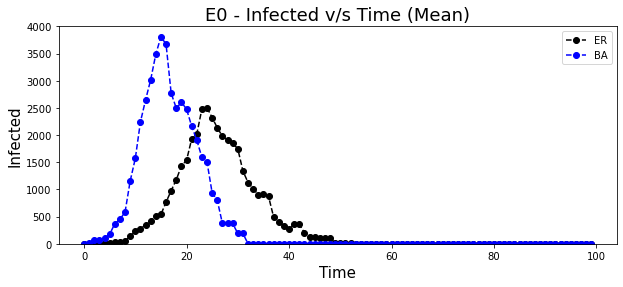

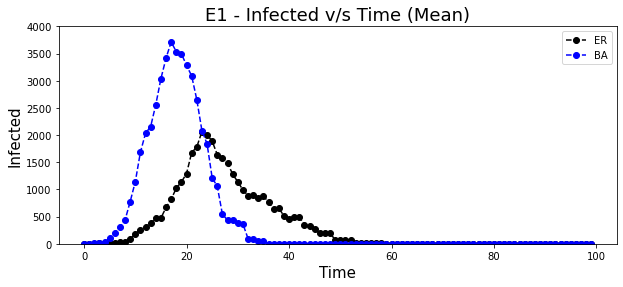

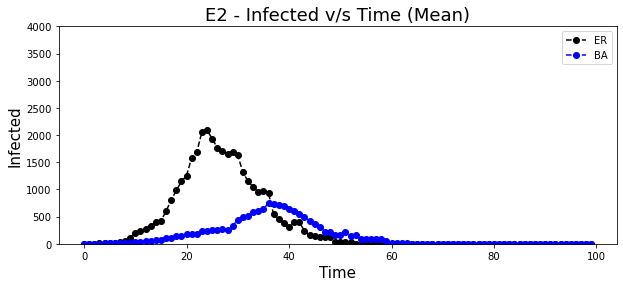

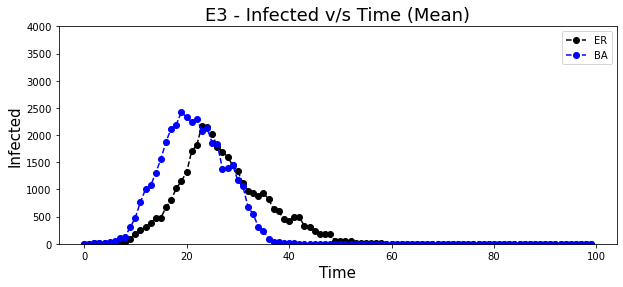

In [46]:
# graficar resultados
T = [i for i in range(tiempo_maximo)]

########## E0 ##########
fig, ax = plt.subplots(figsize=(10,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)


ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Infected', fontsize=15)
ax.set_title('E0 - Infected v/s Time (Mean)', fontsize=18)
plt.ylim(0, 4000)  

plt.plot(T, results_ER_0, 'o', color='black', label='ER',  linestyle='--')
plt.plot(T, results_BA_0, 'o', color='blue', label='BA', linestyle='--' )
ax.legend()
########## E1 ##########

fig, ax = plt.subplots(figsize=(10,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.ylim(0, 4000)  

ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Infected', fontsize=15)
ax.set_title('E1 - Infected v/s Time (Mean)', fontsize=18)

plt.plot(T, results_ER_1, 'o', color='black', label='ER',  linestyle='--')
plt.plot(T, results_BA_1, 'o', color='blue', label='BA', linestyle='--' )
ax.legend()

########## E2 ##########
fig, ax = plt.subplots(figsize=(10,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.ylim(0, 4000)  

ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Infected', fontsize=15)
ax.set_title('E2 - Infected v/s Time (Mean)', fontsize=18)

plt.plot(T, results_ER_2, 'o', color='black', label='ER',  linestyle='--')
plt.plot(T, results_BA_2, 'o', color='blue', label='BA', linestyle='--' )
ax.legend()

########## E3 ##########
fig, ax = plt.subplots(figsize=(10,4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
plt.ylim(0, 4000)  


ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Infected', fontsize=15)
ax.set_title('E3 - Infected v/s Time (Mean)', fontsize=18)

plt.plot(T, results_ER_3, 'o', color='black', label='ER',  linestyle='--')
plt.plot(T, results_BA_3, 'o', color='blue', label='BA', linestyle='--' )
ax.legend()


En general se aprecia en todos los gráficos la curva característica de SIR. En t pequeño la cantidad de infectados es baja debido a que solo se empieza con un infectado y la transmisión es exitosa un 20% de las veces, por lo que es más probable que se detenga la epidemia.

Respecto a E.R:

- Independiente de la estrategia, la epidemia se detiene en el mismo $t = 55$.

- Aplicar vacunas reduce la cantidad de Infectados, pero no hay diferencias significativas
entre las estrategias que aplican vacunas.

Respecto a B.A:

- Al ser libre de escala presenta el siguiente comportamiento: la vacunación aleatoria sin vacunar a todos no es efectiva (escenarios E0 y E1 son prácticamente iguales con peak de 4000 Infectados), pero la vacunación selectiva de nodos con alto grado resulta muy efectiva (escenario E2), reduciendo el peak de infectados a < 1000. Una consecuencia de ello es que el tiempo de epidemia crece respecto a los otros escenarios.   

- La vacunación de nodos al azar y sus vecinos resulta más efectiva que al azar sin vecinos, con un comportamiento similar al de E.R. Aun así es menos efectiva que el escenario E2 en cuanto a número de Infectados. 

Conclusión: 

1) Con un modelo E.R es conveniente vacunar aleatoriamente según las vacunas que uno disponga. En un caso realista es menos costoso vacunar al azar que encontrar hubs o vecinos. 

2) Con un modelo B.A es conveniente vacunar a los hubs según la cantidad de vacunas que uno disponga siempre que se busque minimizar los Infectados por sobre reducir el tiempo de la epidemia. 

Si el costo de realizar esto es muy alto la segunda opción es vacunar al azar y sus vecinos, lo cual implica más infectados pero un menor tiempo de epidemia. Como tercera opción es vacunar al azar con una cantidad de vacunas cercana al número de la población. 